In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from load_data import load_data, load_parameters
from plotting_routines import generate_filename_fRG, change_prefix, plot_fRG, generate_label
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from itertools import product


plt.rc('text', usetex=True)
plt.rc('font', family='serif')


path = "C:/Users/aguir/Documents/Data_Thesis_Local/"
PC = "parquet_check_"
EA = "error_analysis_"

In [2]:
def integrate(x, y):
    res_list = []
    for f in y:
        res = 0
        for i in range(len(f)-1):
            res += ((f[i+1]+f[i])/2)*(x[i+1]-x[i])
        res_list.append(res)
    return res_list    

In [3]:
def log_subst(x):
    return np.log10(1 + x*200.);

In [4]:
def log_resubst(X):
    return 1./200.*(pow(10, X) - 1);

In [5]:
def reconstruct_flow_grid(Lambda_ini, Lambda_fin, nODE):
    X_ini = log_subst(Lambda_ini)
    X_fin = log_subst(Lambda_fin)
    X = np.linspace(X_ini, X_fin, nODE, endpoint=True)
    return log_resubst(X)

In [6]:
def retrieve_Gammas(filenames):
    Gamma_list = []
    for filename in filenames:
        _, _, _, _, _, Gamma, _, _, _ = load_parameters(filename)
        
        Gamma_list.append(Gamma)
        
    return Gamma_list

In [7]:
def load_error_analysis_data_for_file(filename_EA):
    with h5py.File(filename_EA, 'r') as f:
        lambdas = np.array(f['lambdas'])
        norms_K1_fRG = np.array(f['norm_K1_fRG'])
        norms_K1_PC  = np.array(f['norm_K1_BSE'])
        K1_diff_abs = np.array(f['K1_diff_abs'])
        K1_diff_rel = np.array(f['K1_diff_rel'])
    
        norms_K2_fRG = np.array(f['norm_K2_fRG'])
        norms_K2_PC  = np.array(f['norm_K2_BSE'])
        K2_diff_abs = np.array(f['K2_diff_abs'])
        K2_diff_rel = K2_diff_abs/norms_K2_PC#np.array(f['K2_diff_rel'])
                            
        norms_S_fRG = np.array(f['norm_S_fRG'])
        norms_S_PC  = np.array(f['norm_S_SDE'])
        Sigma_diff_abs = np.array(f['Sigma_diff_abs'])
        Sigma_diff_rel = np.array(f['Sigma_diff_rel'])
    
    return lambdas, norms_K1_fRG, norms_K1_PC, K1_diff_abs, K1_diff_rel, \
            norms_K2_fRG, norms_K2_PC, K2_diff_abs, K2_diff_rel, \
            norms_S_fRG, norms_S_PC, Sigma_diff_abs, Sigma_diff_rel

In [8]:
def load_error_analysis_data_complete(filenames):
    lambdas_list= []
    norms_K1_fRG_list, norms_K1_PC_list = [], []
    K1_diff_abs_list, K1_diff_rel_list = [], []
    norms_K2_fRG_list, norms_K2_PC_list = [], []
    K2_diff_abs_list, K2_diff_rel_list = [], []
    norms_S_fRG_list, norms_S_PC_list = [], []
    Sigma_diff_abs_list, Sigma_diff_rel_list = [], []
    
    for filename in filenames:
        lambdas, norms_K1_fRG, norms_K1_PC, K1_diff_abs, K1_diff_rel, \
        norms_K2_fRG, norms_K2_PC, K2_diff_abs, K2_diff_rel, \
        norms_S_fRG, norms_S_PC, Sigma_diff_abs, Sigma_diff_rel = load_error_analysis_data_for_file(filename)
        
        
        lambdas_list.append(lambdas)        
        norms_K1_fRG_list.append(norms_K1_fRG)
        norms_K1_PC_list.append(norms_K1_PC)
        K1_diff_abs_list.append(K1_diff_abs)
        K1_diff_rel_list.append(K1_diff_rel)
        norms_K2_fRG_list.append(norms_K2_fRG)
        norms_K2_PC_list.append(norms_K2_PC)
        K2_diff_abs_list.append(K2_diff_abs)
        K2_diff_rel_list.append(K2_diff_rel)
        norms_S_fRG_list.append(norms_S_fRG)
        norms_S_PC_list.append(norms_S_PC)
        Sigma_diff_abs_list.append(Sigma_diff_abs)
        Sigma_diff_rel_list.append(Sigma_diff_rel)
    
    return lambdas_list, norms_K1_fRG_list, norms_K1_PC_list, K1_diff_abs_list, K1_diff_rel_list, \
            norms_K2_fRG_list, norms_K2_PC_list, K2_diff_abs_list, K2_diff_rel_list, \
            norms_S_fRG_list, norms_S_PC_list, Sigma_diff_abs_list, Sigma_diff_rel_list

In [9]:
Volt = 0.0
Temp = 0.01

In [10]:
name1 = generate_filename_fRG(path, 1, 1, V=Volt, T=Temp)
name2 = generate_filename_fRG(path, 2, 1, V=Volt, T=Temp)
name3 = generate_filename_fRG(path, 2, 2, V=Volt, T=Temp)

Gammas_list = retrieve_Gammas([name1, name2, name3])

name1 = change_prefix(path, EA, name1)
name2 = change_prefix(path, EA, name2)
name3 = change_prefix(path, EA, name3)

filenames_ea=[name1, name2, name3]
labels_ea = generate_label(path+EA,filenames_ea)

In [11]:
lambdas_list, norms_K1_fRG_list, norms_K1_PC_list, K1_diff_abs_list, K1_diff_rel_list, \
norms_K2_fRG_list, norms_K2_PC_list, K2_diff_abs_list, K2_diff_rel_list, \
norms_S_fRG_list, norms_S_PC_list, Sigma_diff_abs_list, Sigma_diff_rel_list = load_error_analysis_data_complete(filenames_ea)

<ipython-input-7-71a73200fb35>:12: RuntimeWarning: invalid value encountered in true_divide
  K2_diff_rel = K2_diff_abs/norms_K2_PC#np.array(f['K2_diff_rel'])


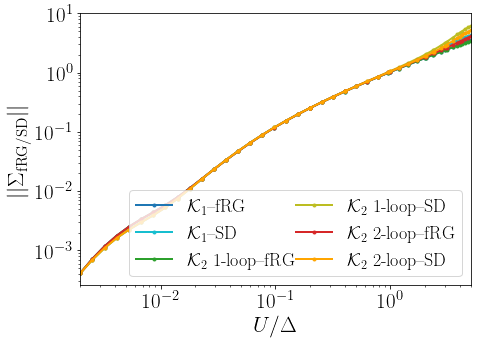

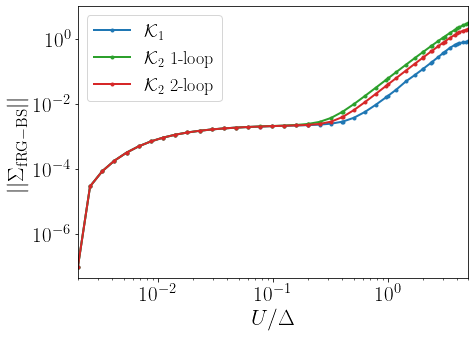

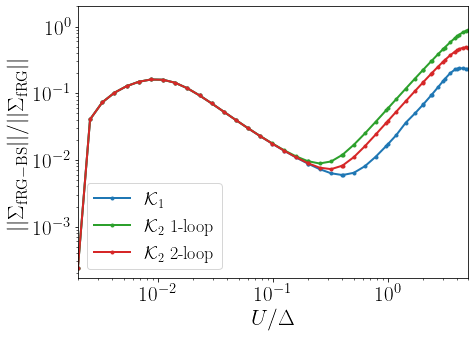

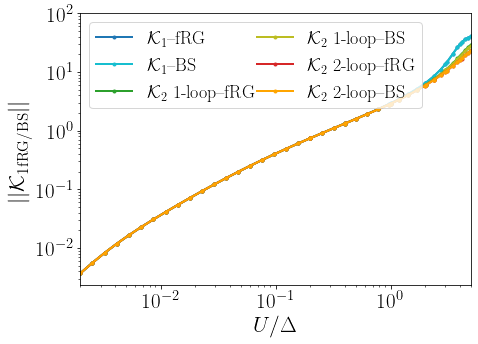

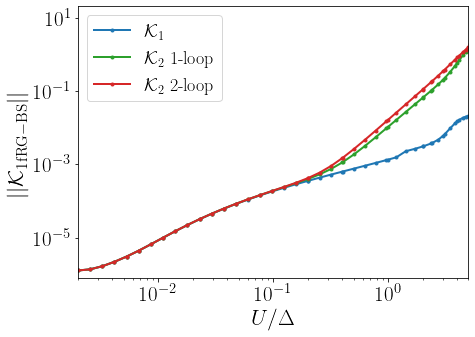

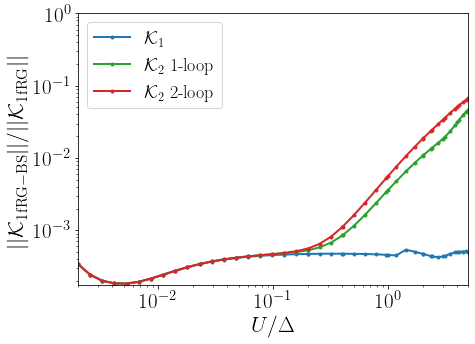

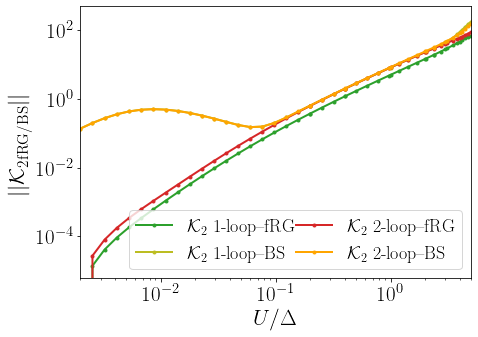

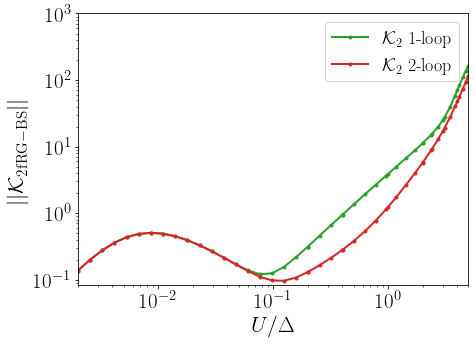

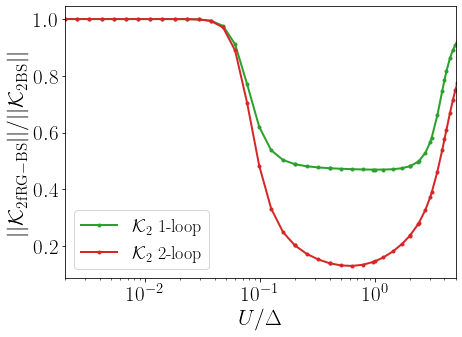

In [12]:
fs = 22
plt.rcParams['legend.title_fontsize'] = fs
plt.rcParams["legend.columnspacing"] = '0.1'

U=1

c=['tab:blue', 'tab:green', 'tab:red']
c_PC=['tab:cyan', 'tab:olive', 'orange']

obj_list = ["self", "K1", "K2"]
typ_list = ["norm", "abs", "rel"]

lw=2

for obj, typ in product(obj_list, typ_list):
    fig, ax = plt.subplots(figsize=(7,5))
    for i in range(len(filenames_ea)):
        Deltas = (lambdas_list[i] + Gammas_list[i])/2
        if obj == "self":
            if typ == "norm":
                ax.plot(U/Deltas, norms_S_fRG_list[i], '.-', label=labels_ea[i] + r'{--fRG}', color=c[i], linewidth=lw)
                ax.plot(U/Deltas, norms_S_PC_list[i] , '.-', label=labels_ea[i] + r'{--SD}', color=c_PC[i], linewidth=lw)
                ax.set_ylabel(r'$||\Sigma_{\mathrm{fRG/SD}}||$',fontsize=fs)
                ax.set_yscale("log")
                ax.set_ylim(top=10)
            elif typ == "abs":
                ax.plot(U/Deltas, Sigma_diff_abs_list[i], '.-', label=labels_ea[i], color=c[i], linewidth=lw)
                ax.set_ylabel(r'$||\Sigma_{\mathrm{fRG}-\mathrm{BS}}||$',fontsize=fs)
                ax.set_yscale("log")
                ax.set_ylim(ymax = 10)
            elif typ == "rel":
                ax.plot(U/Deltas, Sigma_diff_rel_list[i], '.-', label=labels_ea[i], color=c[i], linewidth=lw)
                ax.set_ylabel(r'$||\Sigma_{\mathrm{fRG}-\mathrm{BS}}||/||\Sigma_{\mathrm{fRG}}||$',fontsize=fs)
                ax.set_yscale("log")
                ax.set_ylim(ymax = 2)
        if obj == "K1":
            if typ == "norm":
                ax.plot(U/Deltas, norms_K1_fRG_list[i], '.-', label=labels_ea[i] + r'{--fRG}', color=c[i], linewidth=lw)
                ax.plot(U/Deltas, norms_K1_PC_list[i] , '.-', label=labels_ea[i] + r'{--BS}', color=c_PC[i], linewidth=lw)
                ax.set_ylabel(r'$||{\mathcal{K}_1}_{\mathrm{fRG/BS}}||$',fontsize=fs)
                ax.set_yscale("log")
                ax.set_ylim(ymax = 100)
            if typ == "abs":
                ax.plot(U/Deltas, K1_diff_abs_list[i] , '.-', label=labels_ea[i], color=c[i], linewidth=lw)
                ax.set_ylabel(r'$||{\mathcal{K}_1}_{\mathrm{fRG}-\mathrm{BS}}||$',fontsize=fs)
                ax.set_yscale("log")
                ax.set_ylim(ymax = 20)
            if typ == "rel":
                ax.plot(U/Deltas, K1_diff_rel_list[i] , '.-', label=labels_ea[i], color=c[i], linewidth=lw)
                ax.set_ylabel(r'$||{\mathcal{K}_1}_{\mathrm{fRG}-\mathrm{BS}}||/||{\mathcal{K}_1}_{\mathrm{fRG}}||$',fontsize=fs)
                ax.set_yscale("log")
                ax.set_ylim(ymax = 1)
      
        if(filenames_ea[i][len(path+EA)+1] == str(2)):
            if obj == "K2":
                if typ == "norm":
                    ax.plot(U/Deltas, norms_K2_fRG_list[i], '.-', label=labels_ea[i] + r'{--fRG}', color=c[i], linewidth=lw)
                    ax.plot(U/Deltas, norms_K2_PC_list[i] , '.-', label=labels_ea[i] + r'{--BS}', color=c_PC[i], linewidth=lw)
                    ax.set_ylabel(r'$||{\mathcal{K}_2}_{\mathrm{fRG/BS}}||$',fontsize=fs)
                    ax.set_yscale("log")
                    ax.set_ylim(ymax = 500)
                elif typ == "abs":
                    ax.plot(U/Deltas, K2_diff_abs_list[i] , '.-', label=labels_ea[i], color=c[i], linewidth=lw)
                    ax.set_ylabel(r'$||{\mathcal{K}_2}_{\mathrm{fRG}-\mathrm{BS}}||$',fontsize=fs)
                    ax.set_yscale("log")
                    ax.set_ylim(ymax = 1000)
                elif typ == "rel":
                    ax.plot(U/Deltas, K2_diff_rel_list[i] , '.-', label=labels_ea[i], color=c[i], linewidth=lw)
                    ax.set_ylabel(r'$||{\mathcal{K}_2}_{\mathrm{fRG}-\mathrm{BS}}||/||{\mathcal{K}_2}_{\mathrm{BS}}||$',fontsize=fs)

    ax.set_xlim(U/Deltas[0], 5)
    ax.set_xscale("log")
    ax.set_xlabel(r'$U/\Delta$', fontsize = fs)
    
    ax.legend(fontsize=fs-4, ncol=1 + int(typ == "norm"))

    ax.tick_params(axis='both', labelsize=fs-1)

    plt.savefig("EA_" + obj + "_"  + typ + ".pdf", bbox_inches='tight')
    plt.show()

In [ ]:
Lambda_ini = 1000
Lambda_fin = 0
nODE = 50
Lambdas = reconstruct_flow_grid(Lambda_ini, Lambda_fin, nODE)
Gamma = 1./3.

Deltas_fRG = (Lambdas + Gamma)/2.

U = 1

U_to_add = [0.1, 0.5, 1., 1.5, 2., 2.5, 3]

U_list = 1/(2*Deltas_fRG)
U_list = np.append(U_list, U_to_add)
U_list.sort()

print(U_list)

In [ ]:
Delta_NRG = 0.5
integral = np.zeros((4, len(U_list)))
Deltas = np.zeros(len(U_list))

K1 = generate_filename_fRG(path, 1, 1, V=Volt, T=Temp)
K1_sf = generate_filename_fRG(path, 1, 1, sf=True, V=Volt, T=Temp)
K2_1L = generate_filename_fRG(path, 2, 1, V=Volt, T=Temp)
K2_2L = generate_filename_fRG(path, 2, 2, V=Volt, T=Temp)

filenames = [K1, K1_sf, K2_1L, K2_2L]

for i in range(len(U_list)):
    U_NRG = U_list[i]
    _, _, T, _, _, Gamma, Lambda, Delta, U, V, v, _, A, _, _, _, _, _, _, _, _, _ = load_data(U_NRG, Delta_NRG, filenames)
    if (not (v[0]-v[1]).any()) and (not (v[1]-v[2]).any()) and (not (v[2]-v[3]).any()):
        ffreqs = v[0]
        
    integral[:, i] = (integrate(ffreqs, A))
    Deltas[i] = Delta[0]



In [ ]:
print(integral.shape)

In [ ]:
filename1 = generate_filename_fRG(path, 1, 1, V=Volt, T=Temp)
filename2 = generate_filename_fRG(path, 1, 1, sf=True, V=Volt, T=Temp)
filename3 = generate_filename_fRG(path, 2, 1, V=Volt, T=Temp)
filename4 = generate_filename_fRG(path, 2, 2, V=Volt, T=Temp)

labels = generate_label(path, [filename1, filename2, filename3, filename4])

In [ ]:
fs = 20

fig, ax = plt.subplots(figsize=(10, 5))

for i in range(integral.shape[0]):
    ax.plot(1/Deltas, integral[i], '.', label=labels[i])
    
upper_x = 1/(Deltas[-1])    
ax.set_xlim(1/(Deltas[0]), upper_x)

axins = zoomed_inset_axes(ax, 2, loc='upper right', borderpad = 4.5)
axins.aspect='equal'   
for i in range(integral.shape[0]):
    axins.plot(1/Deltas, integral[i], '.', label=labels[i])
    
critical_x = 1/Deltas[np.where(integral[0]>0.99)[0][0]]
ax.hlines(0.99, 0, 6, linestyles='-.', linewidth = 0.8)
ax.axvline(0.2, linestyle=':', label=r'$U/\Delta = 0.2$', linewidth = 0.8)

ins_x_lim = 1
axins.set_xlim(ins_x_lim, upper_x)
axins.set_xticks(np.linspace(ins_x_lim, upper_x, 3, endpoint=True))
axins.set_ylim(0.99, 1.05)
axins.set_yticks(np.linspace(1, 1.05, 2, endpoint=True))    
axins.tick_params(axis='both', labelsize=fs-4)
plt.xticks(visible=True)  # Present ticks
plt.yticks(visible=True)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")



ax.set_ylabel(r'$\mathcal{N}$', fontsize=fs)    
ax.set_xscale("log")
ax.set_xlabel(r'$U/\Delta$', fontsize = fs)
ax.legend(loc='lower right', fontsize=fs-2)
ax.tick_params(axis='both', labelsize=fs-1)

#plt.tight_layout(pad=3.0)                  
plt.savefig('A_analysis.pdf', bbox_inches='tight')

In [ ]:
print(1/Deltas[20])